In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Import Data
inputdata = pd.read_csv('../data/FSUWell_Jan25-Sep29.csv', parse_dates=['Datetime'],
                        index_col='Datetime', squeeze=True)
inputdata['Gauge_depth_meters'] = inputdata['Gauge_depth_meters'].apply(lambda x: 21 if x <= 20.8 else x)
inputdata['TEMP_C'] = inputdata['TEMP_C'].apply(lambda x: 25.3 if x <= 25.3 else x)
inputdata['TEMP_C'] = inputdata['TEMP_C'].apply(lambda x: 25.5 if x >= 25.5 else x)
inputdata['DISOLVEDO2_%sat']=inputdata['DISOLVEDO2_%sat'].apply(lambda x: 0.001 if x >= 0.001 else x)
#print(inputdata)
SinkholeEvent=inputdata.loc['20210125':'20210925']
print(SinkholeEvent.loc['20210802':'20210804'])


                     Unnamed: 0  RecordNumber     Batt_V    PTemp_C  \
Datetime                                                              
2021-08-02 00:00:00       18144     1671547.0  12.653146  30.901124   
2021-08-02 00:15:00       18145     1671636.5  12.645889  30.853889   
2021-08-02 00:30:00       18146     1671726.5  12.642222  30.802444   
2021-08-02 00:45:00       18147     1671816.5  12.634333  30.759556   
2021-08-02 01:00:00       18148     1671906.5  12.618778  30.717667   
...                         ...           ...        ...        ...   
2021-08-04 22:45:00       18427     1697016.5  12.677778  31.255889   
2021-08-04 23:00:00       18428     1697106.5  12.671444  31.121778   
2021-08-04 23:15:00       18429     1697196.5  12.669222  30.986000   
2021-08-04 23:30:00       18430     1697286.5  12.661333  30.845889   
2021-08-04 23:45:00       18431     1697332.0  12.660000  30.770000   

                     Flux_Wattspersqrmeter  Raw_flux_milivolts    cs_temp  \

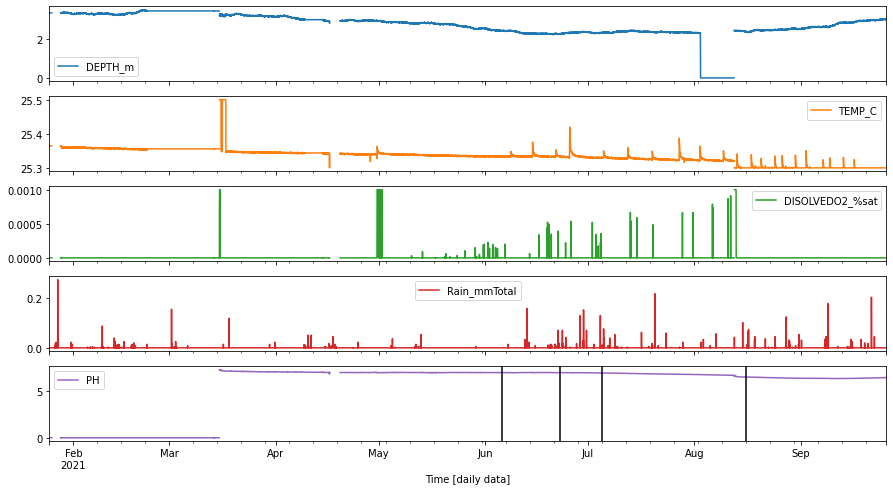

In [5]:
hydrodata = SinkholeEvent[["DEPTH_m", "TEMP_C", "DISOLVEDO2_%sat","Rain_mmTotal","PH"]]

hydrodata.plot(figsize=(15, 8), subplots=True)

plt.axvline(pd.Timestamp('2021-06-06'), color='k')
plt.axvline(pd.Timestamp('2021-06-23'),color='k')
plt.axvline(pd.Timestamp('2021-07-05'),color='k')
plt.axvline(pd.Timestamp('2021-08-16'),color='k')
plt.xlabel('Time [daily data]');